In [2]:
# lakukan load dataset terlebih dahulu
import pandas as pd

df_data = pd.read_csv("dataset_300.csv",engine='python')
df_data.head()

,judul,review,class
0,9,Sekali lagi Tim Burton membuktikan kapasitasny...,1
1,2014,Saya tidak bisa memaafkan apa yang terjadi di ...,0
2,2046,Sudah selayaknya sebuah trilogi hebat ditutup ...,1
3,7500,Shimizu mulai unjuk gigi Ia membawa teror horo...,1
4,Ing,Tidak ada yang terlalu istimewa atau unik seun...,0


In [3]:
# coba kita perhatikan berapa banyak data yang kita dapatkan
df_data.describe()

,class
count,300.000000
mean,0.553333
std,0.497978
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [4]:
df_data["review"][5]

'Satu hal lain yang menonjol dalam 10 Cloverfield Lane selain kualitas narasi dan penyutradaraan yang menyimpang adalah casting yang sempurna Ia hanya punya tiga orang pemain utama dan semua bermain fantastis Kudos terutama patut diberikan kepada aktor senior John Goodman dalam salah satu penampilan terbaiknya Berperan sebagai Howard sang penyelamat Goodman bisa menghadirkan sebuah kompleksitas karakter yang menarik'

In [5]:
df_data['class'].value_counts()

1    166
0    134
Name: class, dtype: int64

In [6]:
df_data[df_data["judul"] == "Aceh_INA"]

,judul,review,class


In [15]:
df_data = pd.read_csv("dataset_300.csv",engine='python')
df_data.tail()

,judul,review,class
295,Hot Tub Time Machine,Steve Pink sang sutradara yang juga pernah men...,1
296,Hotel Transylvania 2,Tidak ada konflik berarti kecuali mungkin keda...,0
297,Hours,Di beberapa momen ia terasa terlalu lambat ham...,0
298,House at the End of the Street,Ya tidak butuh lama untuk membuat penontonnya ...,0
299,Housebound,Sebagai sutradara yang masih bau kencur macam ...,1


In [16]:
# cek lagi data
df_data['class'].value_counts()

1    166
0    134
Name: class, dtype: int64

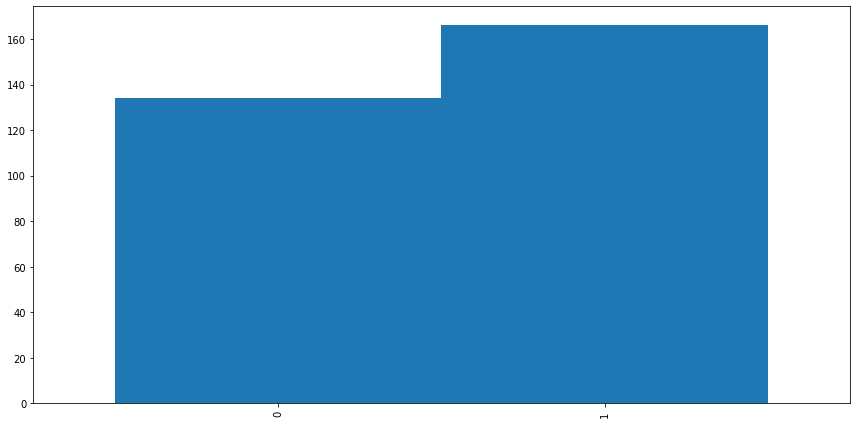

In [17]:
# kita lihat lagi distribusi label
import matplotlib.pyplot as plt

_, ax1 = plt.subplots(figsize=(12,6))

stars_histogram = df_data["class"].value_counts().sort_index()

stars_histogram.plot(kind="bar", width=1.0)
plt.tight_layout()
plt.show()

In [18]:
df_preprocessed = df_data.copy()
df_preprocessed = df_preprocessed.drop(columns=["judul","date"])
df_preprocessed.head()

KeyError: "['date'] not found in axis"

In [19]:
# bootstrap
s_1 = df_preprocessed[df_preprocessed['class']==0].sample(25000,replace=True)
s_2 = df_preprocessed[df_preprocessed['class']==1].sample(25000,replace=True)
df_preprocessed = pd.concat([s_1, s_2])

print(df_preprocessed.shape)
print(df_preprocessed['class'].value_counts(normalize=True))

(50000, 3)
1    0.5
0    0.5
Name: class, dtype: float64


In [ ]:
from wordcloud import WordCloud

In [ ]:
# wordcloud
from wordcloud import WordCloud

# Polarity == 0 negative
train_s0 = df_preprocessed[df_preprocessed["class"] == 0]
all_text_s0 = ' '.join(word for word in train_s0["review"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Polarity == 1 positive
train_s1 = df_preprocessed[df_preprocessed["class"] == 1]
all_text_s1 = ' '.join(word for word in train_s1["review"])
wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='orange', mode='RGBA').generate(all_text_s1)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [119]:
# kita juga bisa cek top 20 kata untuk masing-masing sentiment
from collections import Counter

counter_s0 = Counter(all_text_s0.split()).most_common(50)
counter_s1 = Counter(all_text_s1.split()).most_common(50)
print(counter_s0)
print()
print(counter_s1)

[('yang', 62935), ('tidak', 37645), ('ada', 25290), ('dan', 25000), ('Tidak', 12645), ('terlalu', 12645), ('istimewa', 12645), ('atau', 12645), ('unik', 12645), ('seunik', 12645), ('judulnya', 12645), ('…Ing', 12645), ('lebih', 12645), ('dari', 12645), ('another', 12645), ('melodrama', 12645), ('penguras', 12645), ('air', 12645), ('mata', 12645), ('Korea', 12645), ('Selatan', 12645), ('indah', 12645), ('lembut', 12645), ('manis', 12645), ('pasti', 12645), ('menyentuh', 12645), ('namun', 12645), ('sayang', 12645), ('baru', 12645), ('alias', 12645), ('basi', 12645), ('Saya', 12355), ('bisa', 12355), ('memaafkan', 12355), ('apa', 12355), ('terjadi', 12355), ('di', 12355), ('20', 12355), ('menit', 12355), ('akhir', 12355), ('Ya', 12355), ('itu', 12355), ('seperti', 12355), ('sebuah', 12355), ('lawakan', 12355), ('besar', 12355), ('konyol', 12355), ('sekonyol', 12355), ('ketika', 12355), ('2014', 12355)]

[('yang', 68882), ('dan', 31108), ('dalam', 18792), ('menjadi', 18621), ('teror', 1270

In [123]:
import string, re

def cleansing(data):
    # lower text
    data = data.lower()
    
    # hapus punctuation
    remove = string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data = data.translate(translator)
    
    # remove ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r'', data)
    
    # remove newline
    data = data.replace('\n', ' ')
    
    return data

In [127]:
twitter = []
for index, row in df_preprocessed.iterrows():
    twitter.append(cleansing(row["review"]))
    
df_preprocessed["review"] = twitter
df_preprocessed.head()

,judul,review,class
1,2014,saya tidak bisa memaafkan apa yang terjadi di ...,0
1,2014,saya tidak bisa memaafkan apa yang terjadi di ...,0
4,Ing,tidak ada yang terlalu istimewa atau unik seun...,0
1,2014,saya tidak bisa memaafkan apa yang terjadi di ...,0
4,Ing,tidak ada yang terlalu istimewa atau unik seun...,0


In [128]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
# implementasi pada data kita
twitter = []
for index, row in df_preprocessed.iterrows():
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    twitter = stemmer.stem(row["review"])
    
df_preprocessed["review"] = twitter
df_preprocessed.head()

In [ ]:
twitter = []
for index, row in df_preprocessed.iterrows():
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    twitter.append(stopword.remove(row["review"]))
    
df_preprocessed["review"] = twitter
df_preprocessed.head()

In [92]:
df_preprocessed = df_data.copy()
df_preprocessed = df_preprocessed.drop(columns=['judul','date'])
df_preprocessed.head()

,review,class
0,banda aceh surganya kopi kopi kopi kopi mie sa...,1
1,rt festival guel fiesta panen kopi berlangsung...,1
2,teh kopi ga sama penting sehati eaaaa kode kup...,1
3,lupa nak kopi aceh semalam ufuffbuduufef,1
4,cerita kebun kopi,1


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['review'], df_preprocessed['class'], 
                                                    test_size=0.1, stratify=df_preprocessed['class'], random_state=5)

In [95]:
print (df_preprocessed['class'].value_counts(normalize=True))

1    0.703057
0    0.296943
Name: class, dtype: float64


In [101]:
# implementasi pada dokumen 
from sklearn.feature_extraction.text import CountVectorizer

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

NameError: name 'vectorizer' is not defined

In [99]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [100]:
clf = mnb
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pd.DataFrame(cross_val_score(clf, X_train, y_train, cv=10))

NameError: name 'mnb' is not defined

In [ ]:
predict = mnb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predict))
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
print ("TP : {} \nTN : {} \nFP : {}\nFN : {}".format(tp, tn, fp, fn))

In [ ]:
# import library evaluation
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
target_names = ['Negatif', 'positif']
print(classification_report(y_test, predict, target_names=target_names))

In [ ]:

plt.figure(figsize=(15,6))

plt.subplot(121)
ax = pd.value_counts(df['sentimen']).plot.bar(color= ['slateblue', 'lightsalmon']);
ax.set_xlabel('');
plt.xticks(np.arange(2), ['not spam', 'spam'], rotation='horizontal')
ax.set_ylabel('Count');
ax.set_title('Distribution of spam mail')

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.125, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

plt.subplot(122)
pd.value_counts(df['spam']).plot.pie(autopct='%.1f', labels = ['not spam', 'spam'], shadow = True);
plt.xlabel('(Percentages inside the pie)');
plt.ylabel('');
plt.title('Pie chart same dataframe')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Load the polarity data
x = df_data['sentimen']

labels = ['Negative', 'Positive']
plt.xlabel('Polarity')
plt.ylabel('Data Points')
plt.title("Polarity Distribution")
plt.hist(x)
#plt.xticks(x, labels, rotation='vertical')
plt.xticks(np.arange(0,2,1), labels, rotation='vertical')
plt.grid(True)
plt.show()

In [ ]:
import nltk

In [ ]:
df_data["review"][5]